In [ ]:
import nltk

# Force re-download of punkt and stopwords
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# CLEAN FIX FOR NLTK ERRORS
import nltk
import shutil

# 🧹 Remove corrupted NLTK directory (optional but helpful)
shutil.rmtree('/root/nltk_data', ignore_errors=True)

# ✅ Fresh download of correct tokenizers
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True


🔍 Top 20 Frequent Words:
issue: 11529
please: 8810
assist: 6147
problem: 2285
product: 2268
data: 1655
software: 1553
account: 1463
steps: 1390
noticed: 1208
persists: 1178
help: 1172
resolve: 1165
update: 1155
would: 1126
device: 1111
unable: 1088
could: 1066
tried: 1034
using: 1029


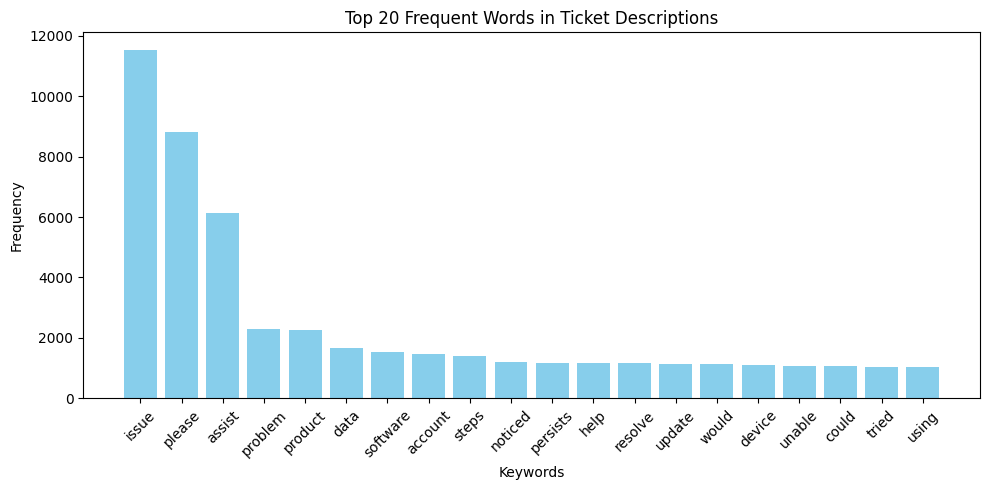

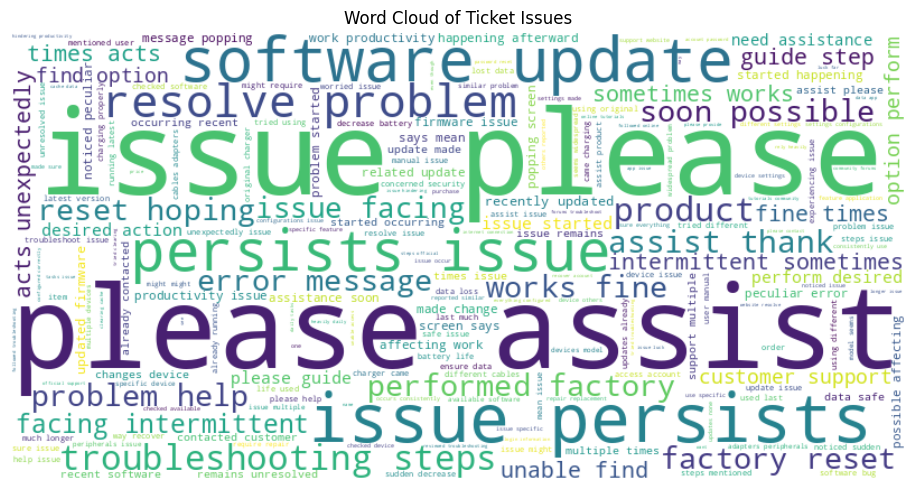

In [ ]:
# ✅ TASK 2 - CUSTOMER SUPPORT TICKET ANALYSIS (FINAL VERSION)

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Step 1: Load the dataset
df = pd.read_csv("customer_support_tickets.csv")  # Change to your actual file
ticket_column = 'Ticket Description'  # Confirmed column

# Step 2: Preprocess the text
def preprocess(text):
    tokens = word_tokenize(str(text).lower())
    words = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    return [word for word in words if word not in stop_words]

df['tokens'] = df[ticket_column].apply(preprocess)

# Step 3: Count most common words
all_words = [word for tokens in df['tokens'] for word in tokens]
word_freq = Counter(all_words).most_common(20)

# Step 4: Display top 20 frequent issue words
print("\n🔍 Top 20 Frequent Words:")
for word, freq in word_freq:
    print(f"{word}: {freq}")

# Step 5: Bar Chart
words_df = pd.DataFrame(word_freq, columns=['Word', 'Frequency'])
plt.figure(figsize=(10,5))
plt.bar(words_df['Word'], words_df['Frequency'], color='skyblue')
plt.title("Top 20 Frequent Words in Ticket Descriptions")
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 6: Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_words))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Ticket Issues")
plt.tight_layout()
plt.show()
